In [1]:
import numpy as np
%matplotlib notebook
import pylab as plt
import pickle as pickle

import networkx as nx

from NAQ_graphs import NAQ

#for automatic graph generation
import yaml as yaml
from graph_generator import generate_graph
import os as os

<IPython.core.display.Javascript object>


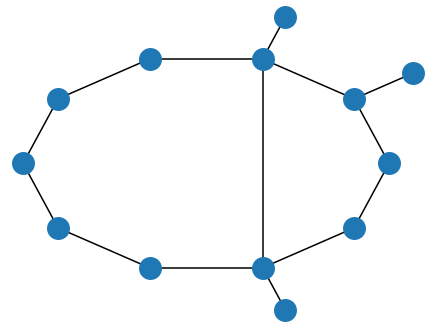

In [2]:
#create a small world network, using automatic generation, see generate_graph and graph_params for more

graph_tpe = 'SM'
params = yaml.load(open('graph_params.yaml','rb'))[graph_tpe]

G, pos  = generate_graph(tpe=graph_tpe, params = params)

if not os.path.isdir(graph_tpe):
    os.mkdir(graph_tpe)
os.chdir(graph_tpe)

#plot the graph
plt.figure(figsize=(4,3))
nx.draw(G, pos=pos, node_size=200)

In [3]:
#setup the main object
chi = np.array([ 1.j for i in range(len(G.edges))])

naq_u1 = NAQ(G, positions = pos, chi = chi, group = 'U1', open_graph = True)

naq_u1.n_processes_scan = 4 #number of CPU to use

#random update
naq_u1.update_chi([1.,1.])

#construct the graph laplacian
naq_u1.update_laplacian()

In [4]:
#find modes in some range of k and alpha=Im(k)
Ks = np.linspace(7, 14, 10)
Alphas = np.linspace(0, .6, 5)

modes = naq_u1.find_modes(Ks, Alphas, params, th = 1e-3) #find many modes (start many searches in a grid)
pickle.dump(modes, open('modes.pkl', 'wb')) #save them for later

17 modes out of 50 attempts


In [5]:
#do a complete fine scan for ploting
Ks = np.linspace(7,14, 100)
Alphas = np.linspace(0,.6, 50)

s = naq_u1.scan_k(Ks,Alphas) #compute a fine scan of the parameter space
pickle.dump([Ks, Alphas, s], open('scan.pkl', 'wb')) #save it for later

<IPython.core.display.Javascript object>


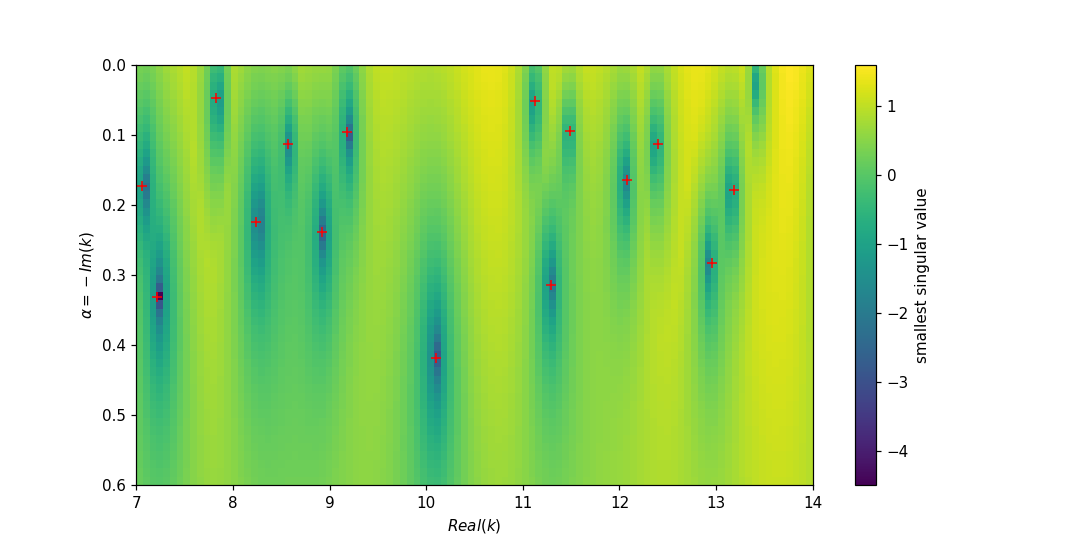

In [6]:
#plot the fine scan and the mode found
naq_u1.plot_scan(Ks,Alphas,s,modes)
plt.savefig('scan_modes.svg')

k= (7.820313321987802-0.04785167631823952j)


<IPython.core.display.Javascript object>


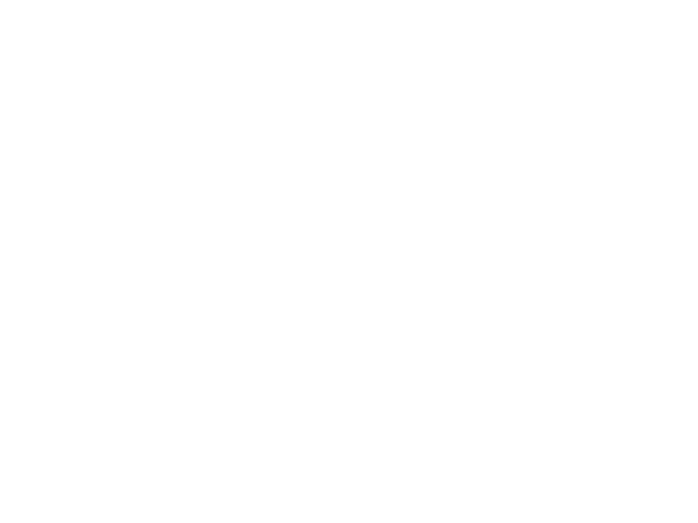

k= (11.126448563846361-0.05175508474670597j)


<IPython.core.display.Javascript object>


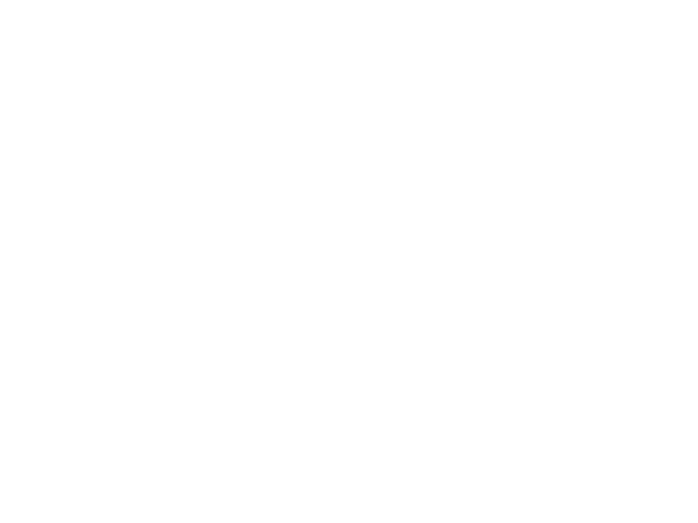

k= (11.48908144693263-0.09479232896381344j)


<IPython.core.display.Javascript object>


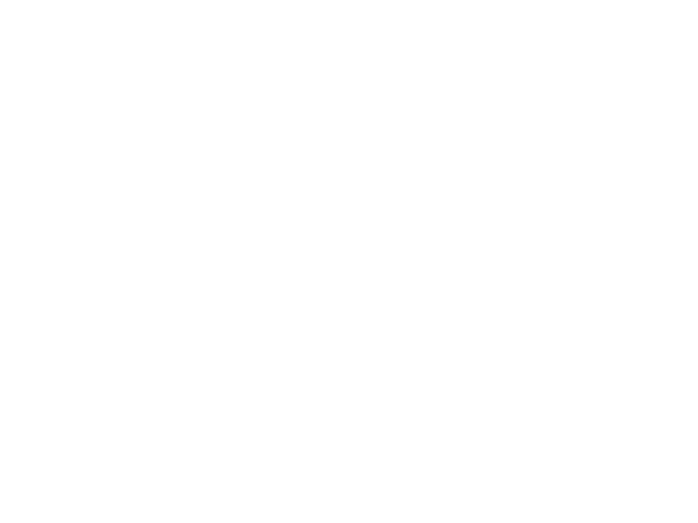

k= (9.18383219454575-0.09591660309079282j)


<IPython.core.display.Javascript object>


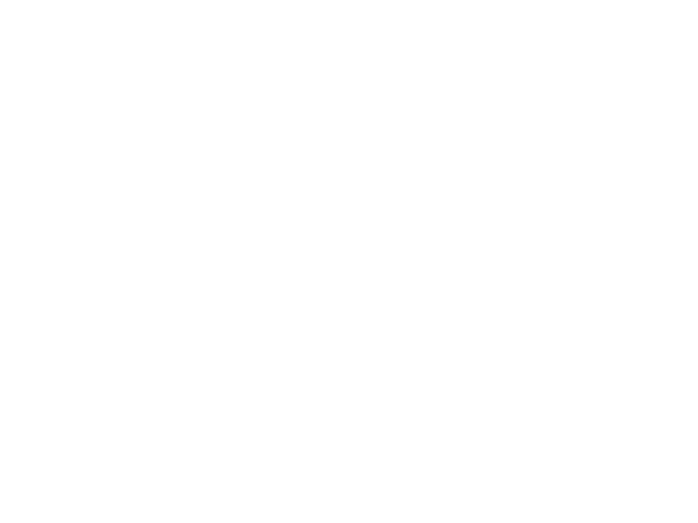

k= (8.574125182590933-0.1122037063163178j)


<IPython.core.display.Javascript object>


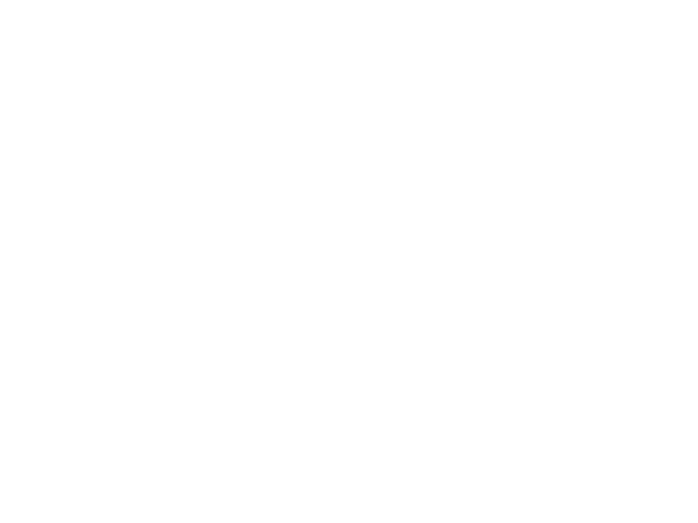

k= (12.40142239004219-0.11322154557226267j)


<IPython.core.display.Javascript object>


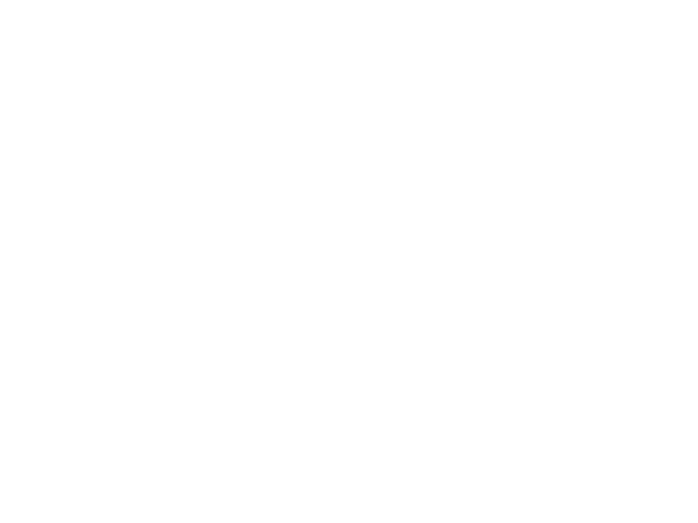

k= (14.237819797101396-0.1535521390268242j)


<IPython.core.display.Javascript object>


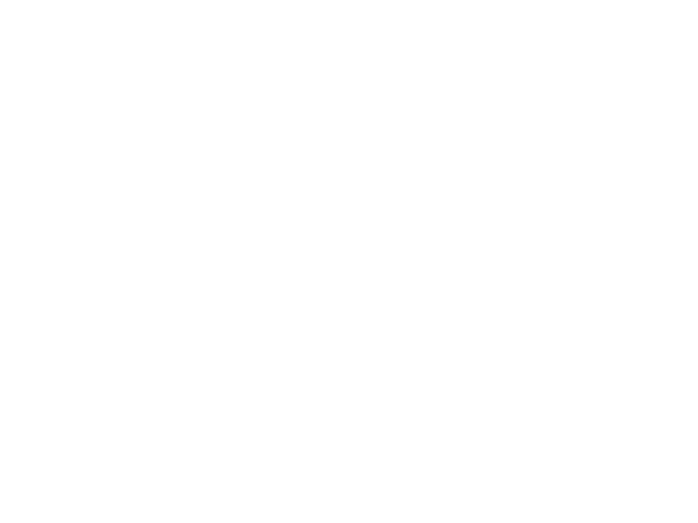

k= (12.072965635683682-0.16425170130417827j)


<IPython.core.display.Javascript object>


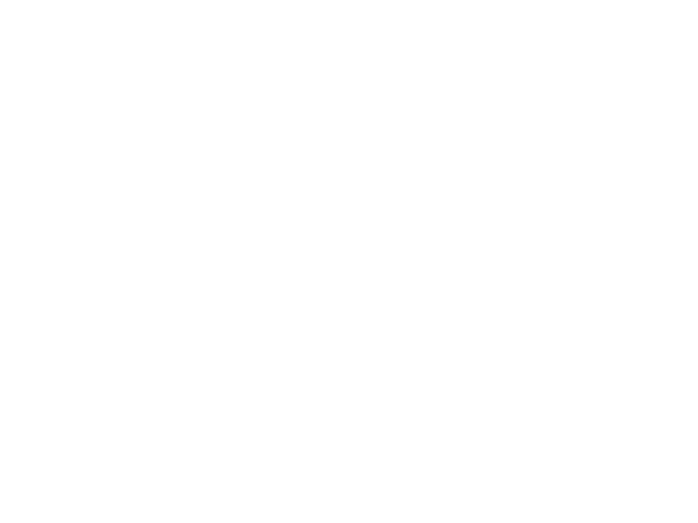

k= (7.053609950749203-0.1730765839250224j)


<IPython.core.display.Javascript object>


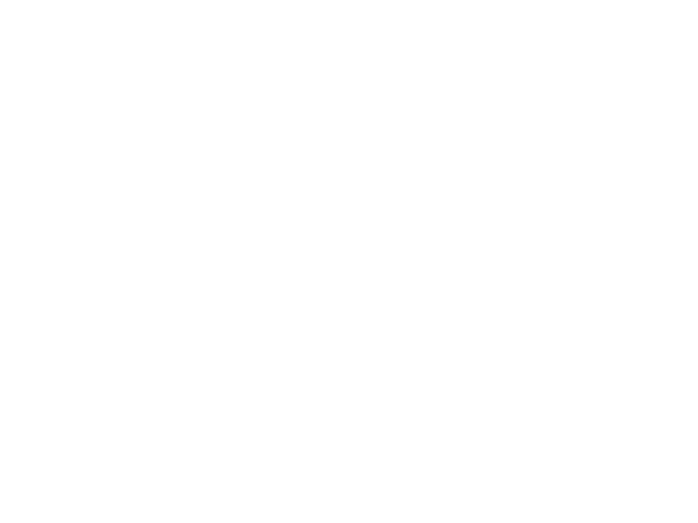

k= (13.182956969778603-0.1792467600571568j)


<IPython.core.display.Javascript object>


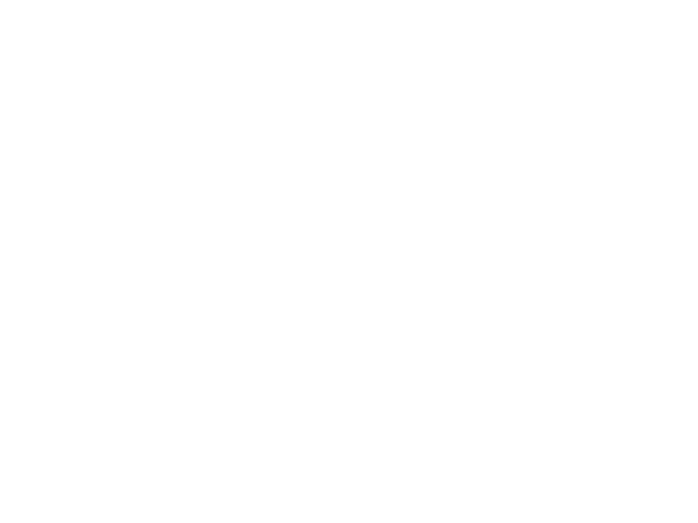

k= (8.24251654470306-0.22358412289329652j)


<IPython.core.display.Javascript object>


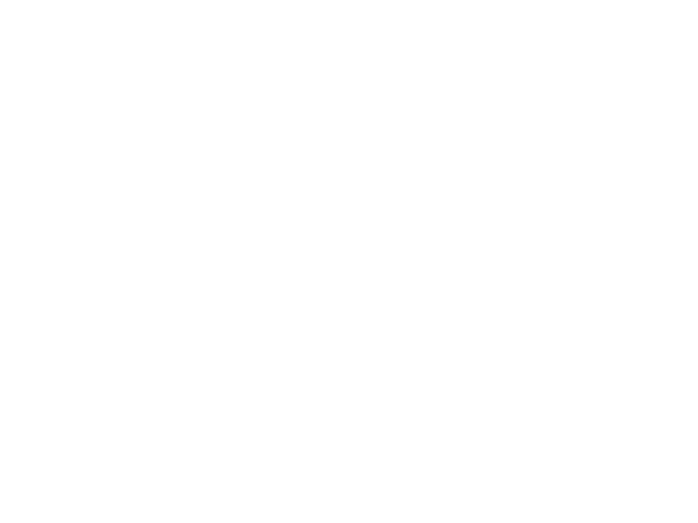

k= (8.921274419478099-0.23864239228910197j)


<IPython.core.display.Javascript object>


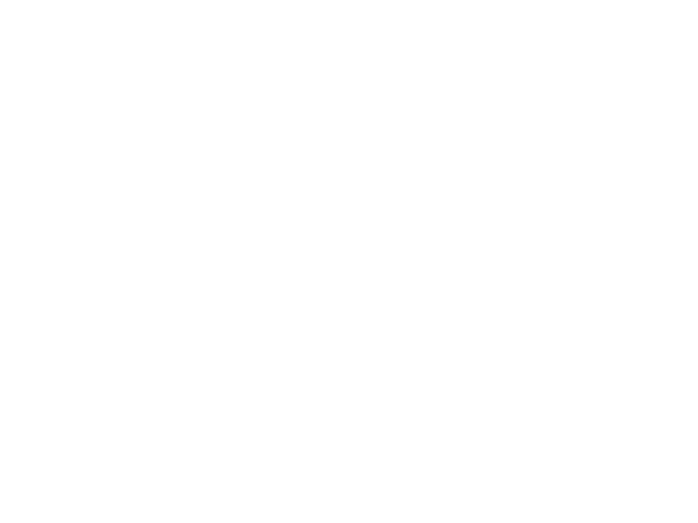

k= (12.956863313728913-0.2829725516372048j)


<IPython.core.display.Javascript object>


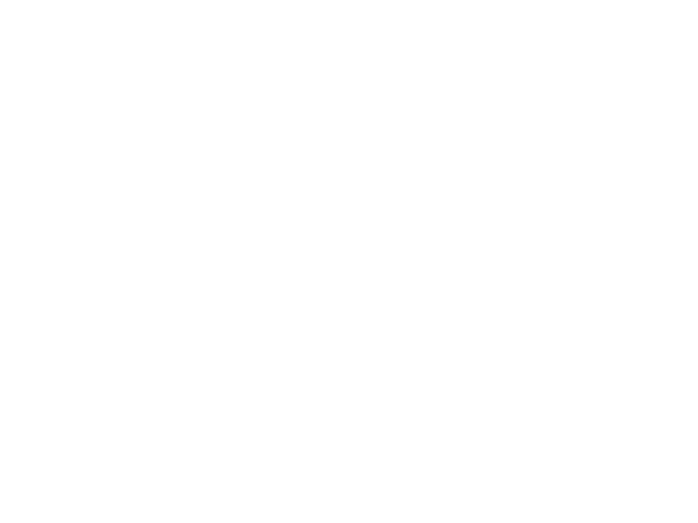

k= (11.293442376950793-0.31424674143269965j)


<IPython.core.display.Javascript object>


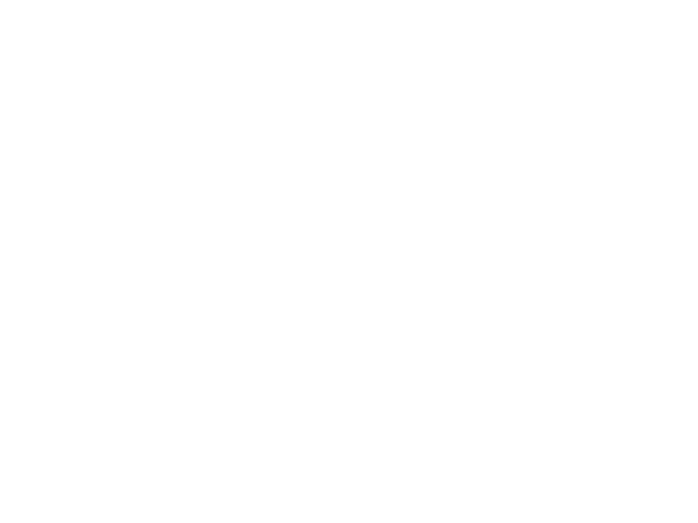

k= (14.374187907567853-0.31459717296813877j)


<IPython.core.display.Javascript object>


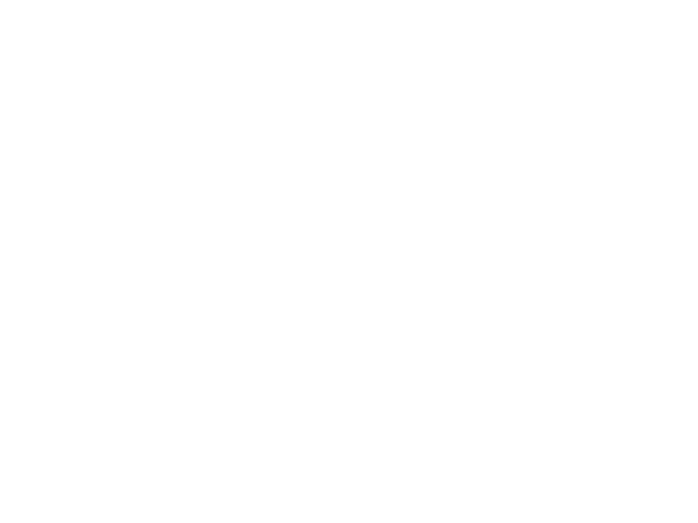

k= (7.21012577282486-0.3315996024641498j)


<IPython.core.display.Javascript object>


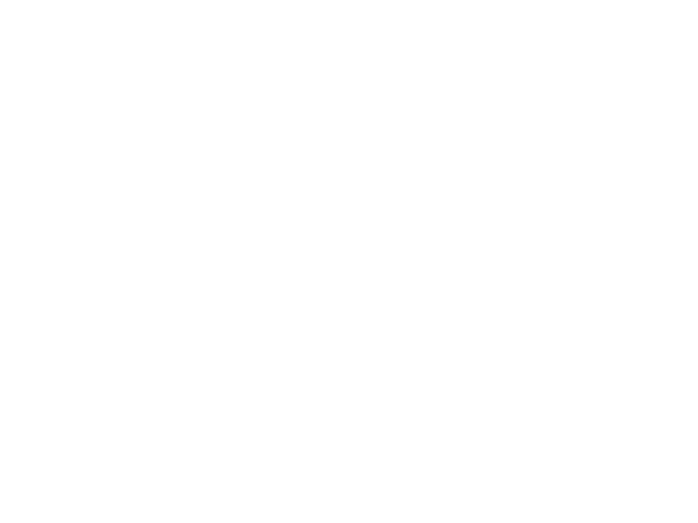

k= (10.097893233121994-0.4183213372819926j)


<IPython.core.display.Javascript object>


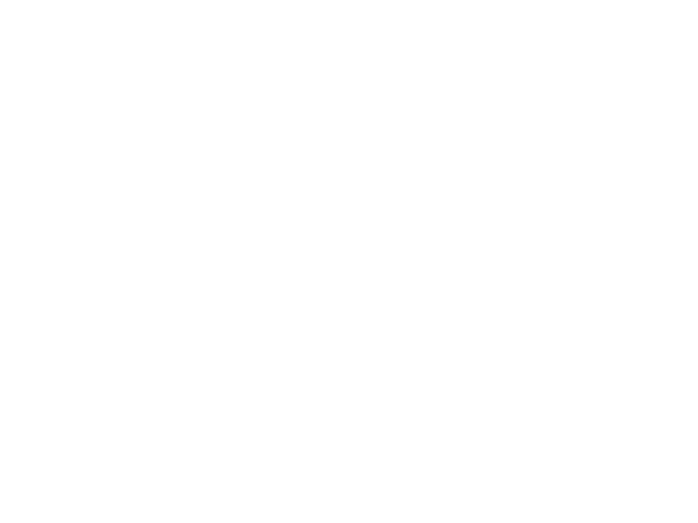

In [7]:
#for each mode, save a figure for it
if not os.path.isdir('modes'):
    os.mkdir('modes')

for m in range(len(modes)):
    print("k=", modes[m,0]-1j*modes[m,1])

    naq_u1.set_chi((modes[m,0]-1j*modes[m,1])*naq_u1.chi0)
    naq_u1.update_laplacian()
    phi = naq_u1.compute_solution()
    
    plt.figure()
    nx.draw_networkx_nodes(G,pos=pos, node_color = np.real(phi), cmap='bwr')#, vmin=-np.max(abs(np.real(phi))),vmax=np.max(abs(np.real(phi))))
    nx.draw_networkx_edges(G,pos=pos) #, vmin=-np.max(abs(np.real(phi))),vmax=np.max(abs(np.real(phi))))

    plt.title("k="+str(np.around(modes[m,0],2)-1j*np.around(modes[m,1],3)))

    plt.savefig('modes/mode_'+str(m)+'.svg')
    plt.close()